In [1]:
%matplotlib ipympl
import pandas as pd
import numpy as np
from statistics import NormalDist
from matplotlib import pyplot as plt

In [2]:
# mods:
# 
# ontario
# starshadow
# monnkeymaster69

In [3]:
def black_scholes_price(S, K, t, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * (sigma**2)) * t) / (sigma * np.sqrt(t))
    print("d1: " + str(d1))
    d2 = d1 - sigma * np.sqrt(t)
    print("d2: " + str(d2))
    if option_type == 'call':
        price = S * NormalDist().cdf(d1) - K * np.exp(-r * t) * NormalDist().cdf(d2)
    else:
        price = K * np.exp(-r * t) * NormalDist().cdf(-d2) - S * NormalDist().cdf(-d1)
    return price
  
buy1 = black_scholes_price(9950, 10000, 250/365, 0.0, 0.1933295134, 'call')
buy2 = black_scholes_price(9950, 10000, 250/252, 0.0, 0.1606393714, 'call')
# buy = black_scholes_price(9938.5, 10000, 250/365, 0.0, 0.194, 'call')
# sell = black_scholes_price(9992, 10000, 50/73, 0.0, 0.2, 'put')
print("buy1 " + str(buy1))
print("buy2 " + str(buy2))
# print("sell " + str(sell))

d1: 0.048672061511557
d2: -0.1113285822189134
d1: 0.04867206151515701
d2: -0.1113285822204873
buy1 611.3473554807606
buy2 611.3473555012743


In [4]:
""" 

Will always exist 3 dataframes:
- df0: prices_round_2_day_-1.csv
- df1: prices_round_2_day_0.csv
- df2: prices_round_2_day_1.csv
  
"""

def initialise_data(round: int, day: int):
  df0 = pd.read_csv("prices_round_" + str(round) + "_day_" + str(day) + ".csv", delimiter=";", index_col=False)
  coco0 = df0[df0["product"] == "COCONUT"]
  coco0.reset_index(drop = True, inplace=True)
  coup0 = df0[df0["product"] == "COCONUT_COUPON"]
  coup0.reset_index(drop = True, inplace=True)
  
  df1 = pd.read_csv("prices_round_" + str(round) + "_day_" + str(day + 1) + ".csv", delimiter=";")
  coco1 = df1[df1["product"] == "COCONUT"]
  coco1.reset_index(drop = True, inplace=True)
  coup1 = df1[df1["product"] == "COCONUT_COUPON"]
  coup1.reset_index(drop = True, inplace=True)

  df2 = pd.read_csv("prices_round_" + str(round) + "_day_" + str(day + 2) + ".csv", delimiter=";")
  coco2 = df2[df2["product"] == "COCONUT"]
  coco2.reset_index(drop = True, inplace=True)
  coup2 = df2[df2["product"] == "COCONUT_COUPON"]
  coup2.reset_index(drop = True, inplace=True)

  return coco0, coup0, coco1, coup1, coco2, coup2

coco0, coup0, coco1, coup1, coco2, coup2 = initialise_data(4, 1)

In [5]:
bid_diff0 = coco0["bid_price_1"] - coup0["bid_price_1"]
ask_diff0 = coco0["ask_price_1"] - coup0["ask_price_1"]
bid_diff1 = coco1["bid_price_1"] - coup1["bid_price_1"]
ask_diff1 = coco1["ask_price_1"] - coup1["ask_price_1"]
bid_diff2 = coco2["bid_price_1"] - coup2["bid_price_1"]
ask_diff2 = coco2["ask_price_1"] - coup2["ask_price_1"]

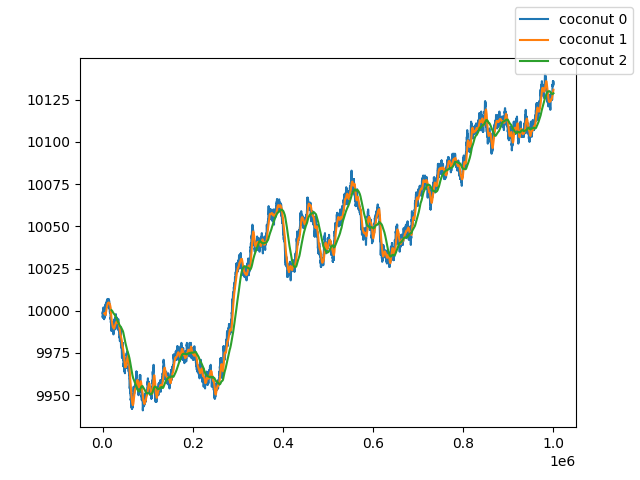

In [6]:
# plt.plot(coco0["timestamp"], coco0["bid_price_1"])
# plt.plot(coup0["timestamp"], coup0["bid_price_1"])
axes, fig = plt.subplots()
fig.plot(coco0["timestamp"], coco0["bid_price_1"])
fig.plot(coco0["timestamp"], coco0["bid_price_1"].rolling(40).mean())
fig.plot(coco0["timestamp"], coco0["bid_price_1"].rolling(200).mean())
# fig.plot(coco0["timestamp"], coco1["bid_price_1"])
# fig.plot(coco0["timestamp"], coco2["bid_price_1"])
axes.legend(["coconut 0", "coconut 1", "coconut 2"])
plt.show()

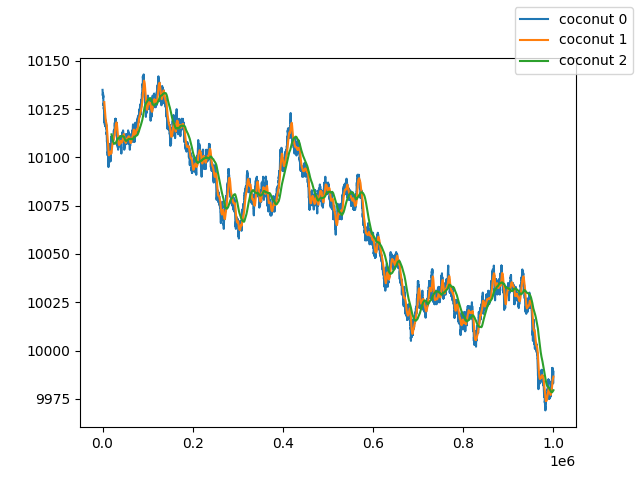

In [7]:
# plt.plot(coco0["timestamp"], coco0["bid_price_1"])
# plt.plot(coup0["timestamp"], coup0["bid_price_1"])
axes, fig = plt.subplots()
# fig.plot(coco0["timestamp"], coco0["bid_price_1"])
fig.plot(coco0["timestamp"], coco1["bid_price_1"])
fig.plot(coco0["timestamp"], coco1["bid_price_1"].rolling(40).mean())
fig.plot(coco0["timestamp"], coco1["bid_price_1"].rolling(200).mean())
# fig.plot(coco0["timestamp"], coco2["bid_price_1"])
axes.legend(["coconut 0", "coconut 1", "coconut 2"])
plt.show()

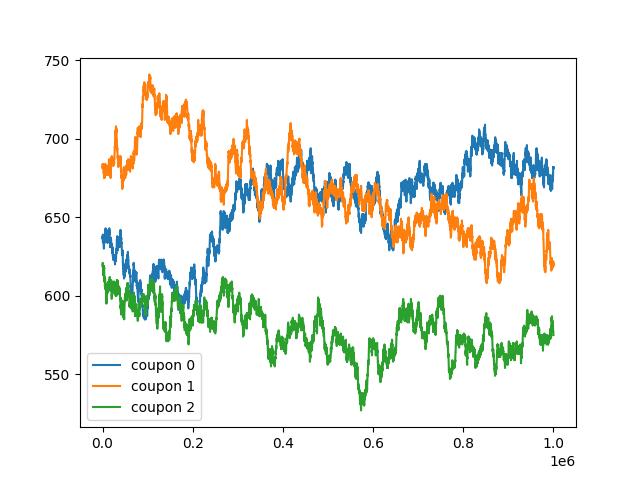

In [8]:
# plt.plot(coco0["timestamp"], coco0["bid_price_1"])
# plt.plot(coup0["timestamp"], coup0["bid_price_1"])
axes, fig = plt.subplots()
fig.plot(coco0["timestamp"], coup0["bid_price_1"])
fig.plot(coco0["timestamp"], coup1["bid_price_1"])
fig.plot(coco0["timestamp"], coup2["bid_price_1"])
fig.legend(["coupon 0", "coupon 1", "coupon 2"])
plt.show()

In [9]:
coco_options_diff1 = coco0["ask_price_1"] - 10000
coup_options_diff1 = coup0["ask_price_1"] - 647.63
coup_predictions1 = coco0["ask_price_1"]
coup_predictions1 = coup_predictions1.apply(lambda x: black_scholes_price(x, 10000, 250/365, 0.0, 0.1933295134, 'call'))
coup_predictions1 = coup_predictions1 - 647.63
coco_options_diff2 = coco1["ask_price_1"] - 10000
coup_options_diff2 = coup1["ask_price_1"] - 647.63
coup_predictions2 = coco1["ask_price_1"]
coup_predictions2 = coup_predictions2.apply(lambda x: black_scholes_price(x, 10000, 249/365, 0.0, 0.1933295134, 'call'))
coup_predictions2 = coup_predictions2 - 647.63
coco_options_diff3 = coco2["ask_price_1"] - 10000
coup_options_diff3 = coup2["ask_price_1"] - 647.63
coup_predictions3 = coco2["ask_price_1"]
coup_predictions3 = coup_predictions3.apply(lambda x: black_scholes_price(x, 10000, 248/365, 0.0, 0.1933295134, 'call'))
coup_predictions3 = coup_predictions3 - 647.63
coup_predictions1

d1: 0.080625288102882
d2: -0.0793753556275884
d1: 0.0800003218652352
d2: -0.0800003218652352
d1: 0.07937529312783954
d2: -0.08062535060263086
d1: 0.0800003218652352
d2: -0.0800003218652352
d1: 0.07937529312783954
d2: -0.08062535060263086
d1: 0.07812504810379063
d2: -0.08187559562667977
d1: 0.07875020187819322
d2: -0.08125044185227719
d1: 0.07937529312783954
d2: -0.08062535060263086
d1: 0.07875020187819322
d2: -0.08125044185227719
d1: 0.07812504810379063
d2: -0.08187559562667977
d1: 0.0800003218652352
d2: -0.0800003218652352
d1: 0.07937529312783954
d2: -0.08062535060263086
d1: 0.07875020187819322
d2: -0.08125044185227719
d1: 0.0800003218652352
d2: -0.0800003218652352
d1: 0.0800003218652352
d2: -0.0800003218652352
d1: 0.081250191853278
d2: -0.0787504518771924
d1: 0.08187503312891757
d2: -0.07812561060155283
d1: 0.081250191853278
d2: -0.0787504518771924
d1: 0.08187503312891757
d2: -0.07812561060155283
d1: 0.081250191853278
d2: -0.0787504518771924
d1: 0.08187503312891757
d2: -0.07812561060

0       -9.467994
1      -10.000000
2      -10.531757
3      -10.000000
4      -10.531757
          ...    
9995    64.617541
9996    65.182965
9997    64.052360
9998    64.617541
9999    64.617541
Name: ask_price_1, Length: 10000, dtype: float64

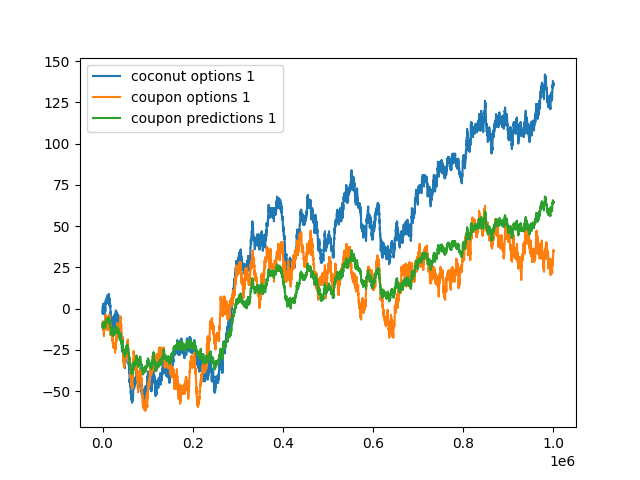

In [17]:
axes, fig = plt.subplots()
fig.plot(coco0["timestamp"], coco_options_diff1)
fig.plot(coco0["timestamp"], coup_options_diff1)
# fig.plot(coco0["timestamp"], coco_options_diff1 - coup_options_diff1)
fig.plot(coco0["timestamp"], coup_predictions1)
fig.legend(["coconut options 1", "coupon options 1", "coupon predictions 1"])
plt.show()

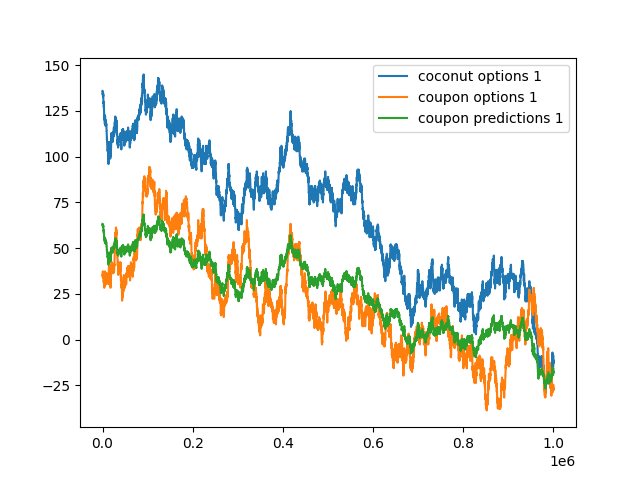

In [18]:
axes, fig = plt.subplots()
fig.plot(coco1["timestamp"], coco_options_diff2)
fig.plot(coco1["timestamp"], coup_options_diff2)
# fig.plot(coco0["timestamp"], coco_options_diff2 - coup_options_diff2)
fig.plot(coco1["timestamp"], coup_predictions2)
fig.legend(["coconut options 1", "coupon options 1", "coupon predictions 1"])
plt.show()

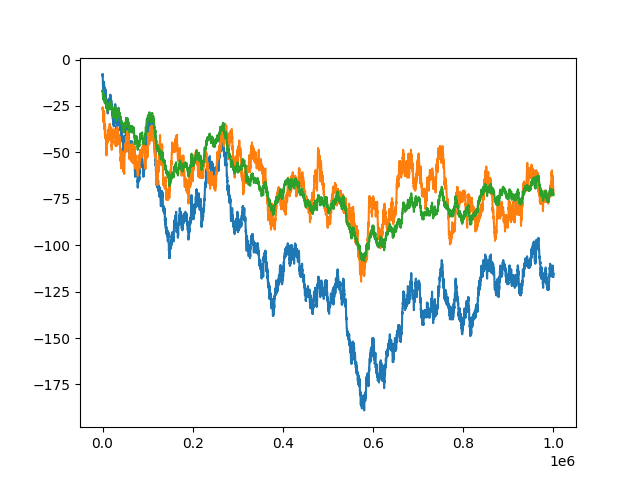

In [21]:
axes, fig = plt.subplots()
fig.plot(coco2["timestamp"], coco_options_diff3)
fig.plot(coco2["timestamp"], coup_options_diff3)
# fig.plot(coco0["timestamp"], coco_options_diff3 - coup_options_diff3)
# fig.plot(coco0["timestamp"], coco_options_diff3 - coup_predictions3)
fig.plot(coco2["timestamp"], coup_predictions3)
plt.show()

In [13]:
standard_deviation1 = coco0[["ask_price_3", "bid_price_3"]].copy()
standard_deviation1["bid_price_3"] = standard_deviation1["bid_price_3"].fillna(coco0['bid_price_2'])
standard_deviation1["bid_price_3"] = standard_deviation1["bid_price_3"].fillna(coco0['bid_price_1'])
standard_deviation1["ask_price_3"] = standard_deviation1["ask_price_3"].fillna(coco0['ask_price_2'])
standard_deviation1["ask_price_3"] = standard_deviation1["ask_price_3"].fillna(coco0['ask_price_1'])
standard_deviation2 = coco1[["ask_price_3", "bid_price_3"]].copy()
standard_deviation2["bid_price_3"] = standard_deviation2["bid_price_3"].fillna(coco1['bid_price_2'])
standard_deviation2["bid_price_3"] = standard_deviation2["bid_price_3"].fillna(coco1['bid_price_1'])
standard_deviation2["ask_price_3"] = standard_deviation2["ask_price_3"].fillna(coco1['ask_price_2'])
standard_deviation2["ask_price_3"] = standard_deviation2["ask_price_3"].fillna(coco1['ask_price_1'])
standard_deviation3 = coco2[["ask_price_3", "bid_price_3"]].copy()
standard_deviation3["bid_price_3"] = standard_deviation3["bid_price_3"].fillna(coco2['bid_price_2'])
standard_deviation3["bid_price_3"] = standard_deviation3["bid_price_3"].fillna(coco2['bid_price_1'])
standard_deviation3["ask_price_3"] = standard_deviation3["ask_price_3"].fillna(coco2['ask_price_2'])
standard_deviation3["ask_price_3"] = standard_deviation3["ask_price_3"].fillna(coco2['ask_price_1'])
standard_deviation = pd.concat([standard_deviation1, standard_deviation2, standard_deviation3], axis=0, ignore_index = True)
standard_deviation.insert(2, "mid_price", (standard_deviation["ask_price_3"] + standard_deviation["bid_price_3"]) / 2)
standard_deviation.insert(3, "mean_mid_price", 10000)
standard_deviation.insert(4, "deviation", standard_deviation["mid_price"] - standard_deviation["mean_mid_price"])
standard_deviation.insert(5, "deviation_squared", standard_deviation["deviation"] ** 2)
standard_deviation.insert(6, "variance", sum(standard_deviation["deviation_squared"])/30000)
standard_deviation.insert(7, "standard_deviation", standard_deviation["variance"] ** 0.5)
standard_deviation1

,ask_price_3,bid_price_3
0,10001.0,9999.0
1,10001.0,9998.0
2,10000.0,9997.0
3,10001.0,9998.0
4,10000.0,9997.0
...,...,...
9995,10137.0,10134.0
9996,10138.0,10135.0
9997,10136.0,10133.0
9998,10136.0,10133.0


In [14]:
def black_scholes_price(S, K, t, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * (sigma**2)) * t) / (sigma * np.sqrt(t))
    print("d1: " + str(d1))
    d2 = d1 - sigma * np.sqrt(t)
    print("d2: " + str(d2))
    if option_type == 'call':
        price = S * NormalDist().cdf(d1) - K * np.exp(-r * t) * NormalDist().cdf(d2)
    else:
        price = K * np.exp(-r * t) * NormalDist().cdf(-d2) - S * NormalDist().cdf(-d1)
    return price
  
buy1 = black_scholes_price(9950, 10000, 250/365, 0.0, 0.1933295134, 'call')
buy2 = black_scholes_price(9950, 10000, 250/252, 0.0, 0.1606393714, 'call')
# buy = black_scholes_price(9938.5, 10000, 250/365, 0.0, 0.194, 'call')
# sell = black_scholes_price(9992, 10000, 50/73, 0.0, 0.2, 'put')
print("buy1 " + str(buy1))
print("buy2 " + str(buy2))
# print("sell " + str(sell))

d1: 0.048672061511557
d2: -0.1113285822189134
d1: 0.04867206151515701
d2: -0.1113285822204873
buy1 611.3473554807606
buy2 611.3473555012743


In [15]:

coup_standard_deviation1 = coup0[["ask_price_3", "bid_price_3"]].copy()
coup_standard_deviation1["bid_price_3"] = coup_standard_deviation1["bid_price_3"].fillna(coup0['bid_price_2'])
coup_standard_deviation1["bid_price_3"] = coup_standard_deviation1["bid_price_3"].fillna(coup0['bid_price_1'])
coup_standard_deviation1["ask_price_3"] = coup_standard_deviation1["ask_price_3"].fillna(coup0['ask_price_2'])
coup_standard_deviation1["ask_price_3"] = coup_standard_deviation1["ask_price_3"].fillna(coup0['ask_price_1'])
coup_standard_deviation2 = coup1[["ask_price_3", "bid_price_3"]].copy()
coup_standard_deviation2["bid_price_3"] = coup_standard_deviation2["bid_price_3"].fillna(coup1['bid_price_2'])
coup_standard_deviation2["bid_price_3"] = coup_standard_deviation2["bid_price_3"].fillna(coup1['bid_price_1'])
coup_standard_deviation2["ask_price_3"] = coup_standard_deviation2["ask_price_3"].fillna(coup1['ask_price_2'])
coup_standard_deviation2["ask_price_3"] = coup_standard_deviation2["ask_price_3"].fillna(coup1['ask_price_1'])
coup_standard_deviation3 = coup2[["ask_price_3", "bid_price_3"]].copy()
coup_standard_deviation3["bid_price_3"] = coup_standard_deviation3["bid_price_3"].fillna(coup2['bid_price_2'])
coup_standard_deviation3["bid_price_3"] = coup_standard_deviation3["bid_price_3"].fillna(coup2['bid_price_1'])
coup_standard_deviation3["ask_price_3"] = coup_standard_deviation3["ask_price_3"].fillna(coup2['ask_price_2'])
coup_standard_deviation3["ask_price_3"] = coup_standard_deviation3["ask_price_3"].fillna(coup2['ask_price_1'])
coup_standard_deviation = pd.concat([coup_standard_deviation1, coup_standard_deviation2, coup_standard_deviation3], axis=0, ignore_index = True)
coup_standard_deviation["ask_price_3"] = coup_standard_deviation["ask_price_3"].fillna(value=coup_standard_deviation["ask_price_3"].mean())
coup_standard_deviation["bid_price_3"] = coup_standard_deviation["bid_price_3"].fillna(value=coup_standard_deviation["bid_price_3"].mean())
coup_standard_deviation.insert(2, "mid_price", (coup_standard_deviation["ask_price_3"] + coup_standard_deviation["bid_price_3"]) / 2)
coup_standard_deviation.insert(3, "mean_mid_price", sum(coup_standard_deviation["mid_price"])/30000)
# coup_standard_deviation.insert(4, "deviation", coup_standard_deviation["mid_price"] - coup_standard_deviation["mean_mid_price"])
# coup_standard_deviation.insert(5, "deviation_squared", coup_standard_deviation["deviation"] ** 2)
# coup_standard_deviation.insert(6, "variance", sum(coup_standard_deviation["deviation_squared"])/30000)
# coup_standard_deviation.insert(7, "standard_deviation", coup_standard_deviation["variance"] ** 0.5)
coup_standard_deviation.iloc[19716]
coup_standard_deviation

,ask_price_3,bid_price_3,mid_price,mean_mid_price
0,638.0,637.0,637.5,635.045949
1,638.0,637.0,637.5,635.045949
2,638.0,637.0,637.5,635.045949
3,639.0,638.0,638.5,635.045949
4,638.0,637.0,637.5,635.045949
...,...,...,...,...
29995,578.0,577.0,577.5,635.045949
29996,578.0,577.0,577.5,635.045949
29997,576.0,575.0,575.5,635.045949
29998,576.0,575.0,575.5,635.045949


In [16]:
round_data = pd.read_csv("round_data.csv", delimiter=";", index_col=False)
chocolate = round_data[round_data["product"] == "CHOCOLATE"]
chocolate.reset_index(drop = True, inplace=True)
strawberries = round_data[round_data["product"] == "STRAWBERRIES"]
strawberries.reset_index(drop = True, inplace=True)
roses = round_data[round_data["product"] == "ROSES"]
roses.reset_index(drop = True, inplace=True)
gift_basket = round_data[round_data["product"] == "GIFT_BASKET"]
gift_basket.reset_index(drop = True, inplace=True)
coconut = round_data[round_data["product"] == "COCONUT"]
coconut.reset_index(drop = True, inplace=True)
coconut_coupon = round_data[round_data["product"] == "COCONUT_COUPON"]
coconut_coupon.reset_index(drop = True, inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: 'round_data.csv'

d1: 0.07499834092247513
d2: -0.08500230280799527
d1: 0.07437281173670762
d2: -0.08562783199376278
d1: 0.07437281173670762
d2: -0.08562783199376278
d1: 0.07499834092247513
d2: -0.08500230280799527
d1: 0.07437281173670762
d2: -0.08562783199376278
d1: 0.07312156551543555
d2: -0.08687907821503485
d1: 0.07187006874425768
d2: -0.08813057498621273
d1: 0.07187006874425768
d2: -0.08813057498621273
d1: 0.07187006874425768
d2: -0.08813057498621273
d1: 0.07124422637109376
d2: -0.08875641735937664
d1: 0.07187006874425768
d2: -0.08813057498621273
d1: 0.07187006874425768
d2: -0.08813057498621273
d1: 0.07249584845485596
d2: -0.08750479527561444
d1: 0.07061832132281352
d2: -0.08938232240765688
d1: 0.06999235358686175
d2: -0.09000829014360866
d1: 0.06999235358686175
d2: -0.09000829014360866
d1: 0.06999235358686175
d2: -0.09000829014360866
d1: 0.07061832132281352
d2: -0.08938232240765688
d1: 0.06999235358686175
d2: -0.09000829014360866
d1: 0.0693663231506816
d2: -0.0906343205797888
d1: 0.0699923535868617

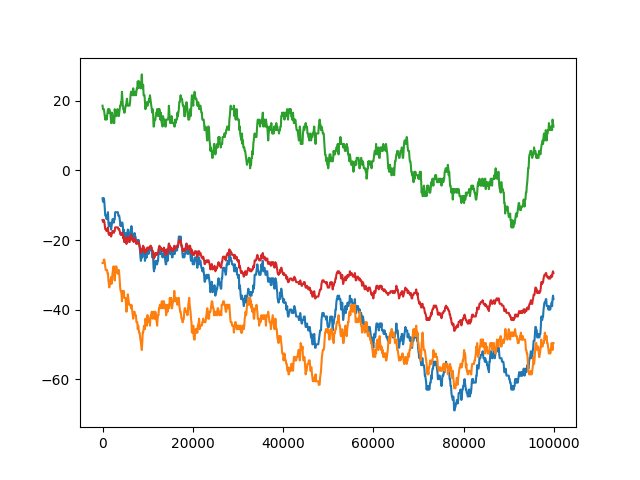

In [ ]:
original_coco_options_diff = coconut["ask_price_1"] - 10000
original_coup_options_diff = coconut_coupon["ask_price_1"] - 647.63 
original_coup_predictions = coconut["ask_price_1"]
original_coup_predictions = original_coup_predictions.apply(lambda x: black_scholes_price(x, 10000, 250/365, 0.0, 0.1933295134, 'call'))
original_coup_predictions = original_coup_predictions - 647.63

fig, axes = plt.subplots()
axes.plot(coconut["timestamp"], original_coco_options_diff)
axes.plot(coconut["timestamp"], original_coup_options_diff)
axes.plot(coconut["timestamp"], original_coco_options_diff - original_coup_options_diff)
axes.plot(coconut["timestamp"], original_coup_predictions)
plt.show()

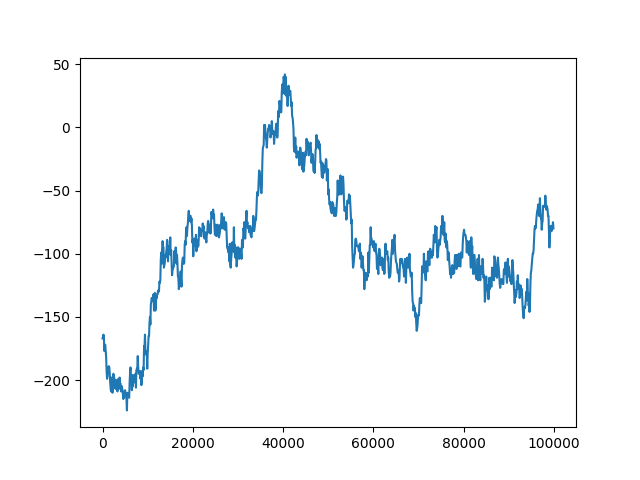

In [ ]:
diy = pd.DataFrame()
diy["timestamp"] = chocolate["timestamp"]
diy["sum"] = 4*chocolate["ask_price_1"] + 6*strawberries["ask_price_1"] + roses["ask_price_1"] +375
diy["difference"] = gift_basket["bid_price_1"] - diy["sum"]

fig, axes = plt.subplots()
axes.plot(diy["timestamp"], diy["difference"])
plt.show()

In [ ]:
differences = pd.Series(diy["difference"].to_list() + diy1["difference"].to_list() + diy2["difference"].to_list())
print("OVERALL MEAN: " + str(differences.mean()))
print("OVERALL STD: " + str(differences.std()))
diff1 = pd.Series(diy["difference"].to_list())
print("MEAN1: " + str(diff1.mean()))
print("STD1: " + str(diff1.std()))
diff2 = pd.Series(diy1["difference"].to_list())
print("MEAN2: " + str(diff2.mean()))
print("STD2: " + str(diff2.std()))
diff3 = pd.Series(diy2["difference"].to_list())
print("MEAN3: " + str(diff3.mean()))
print("STD3: " + str(diff3.std()))

OVERALL MEAN: -0.05848333333333333
OVERALL STD: 76.44361021182736
MEAN1: 9.23425
STD1: 85.291187473288
MEAN2: -2.4847
STD2: 65.77583379890515
MEAN3: -6.925
STD3: 76.10252350880647


NameError: name 'df1' is not defined

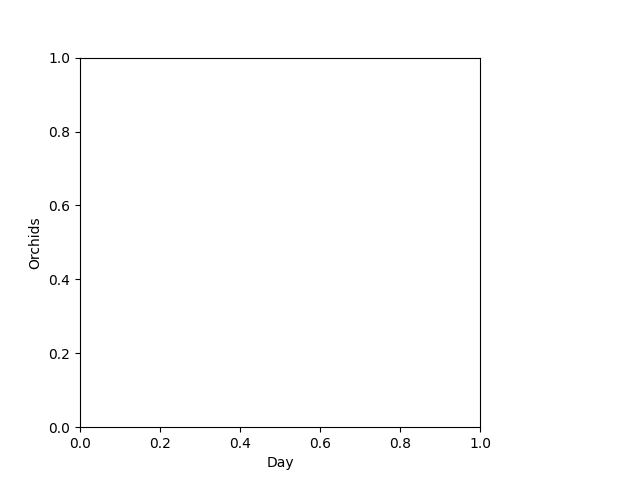

In [ ]:
fig, price = plt.subplots()
fig.subplots_adjust(right=0.75)

price.set_xlabel('Day')
price.set_ylabel('Orchids')
price.plot(df1.index, df1["ORCHIDS"])
price.tick_params(axis='y')

sunlight = price.twinx()

sunlight.set_ylabel('Sunlight')
sunlight.plot(df1.index, df1["SUNLIGHT"])
sunlight.tick_params(axis='y')

humidity = price.twinx()
humidity.spines.right.set_position(("axes", 1.2))

color = 'midnightblue'
humidity.set_ylabel('Humidity')
humidity.plot(df1.index, df1["HUMIDITY"], color="darkslategray")
humidity.tick_params(axis='y')

fig.tight_layout()
plt.show(block=True)


In [ ]:
fig, price = plt.subplots()
fig.subplots_adjust(right=0.75)

price.set_xlabel('Day')
price.set_ylabel('Orchids')
price.plot(df2.index, df2["ORCHIDS"])
price.tick_params(axis='y')

sunlight = price.twinx()

sunlight.set_ylabel('Sunlight')
sunlight.plot(df2.index, df2["SUNLIGHT"])
sunlight.tick_params(axis='y')

humidity = price.twinx()
humidity.spines.right.set_position(("axes", 1.2))

color = 'midnightblue'
humidity.set_ylabel('Humidity')
humidity.plot(df2.index, df2["HUMIDITY"], color="darkgoldenrod")
humidity.tick_params(axis='y')

fig.tight_layout()
plt.show(block=True)

In [ ]:
df = pd.read_csv("only_useful_data.csv", delimiter=";")
df = df.drop(columns=["day", "timestamp"])

orchids = df[df["product"] == "ORCHIDS"]
orchids = orchids.drop(columns=["product"])
orchids

In [ ]:
fig, price = plt.subplots()
fig.subplots_adjust(right=0.75)

price.set_xlabel('timestamp')
price.set_ylabel('')
price.plot(df2.index, df2["ORCHIDS"])
price.tick_params(axis='y')

sunlight = price.twinx()

sunlight.set_ylabel('Sunlight')
sunlight.plot(df2.index, df2["SUNLIGHT"])
sunlight.tick_params(axis='y')

humidity = price.twinx()
humidity.spines.right.set_position(("axes", 1.2))

color = 'midnightblue'
humidity.set_ylabel('Humidity')
humidity.plot(df2.index, df2["HUMIDITY"], color="darkgoldenrod")
humidity.tick_params(axis='y')

fig.tight_layout()
plt.show(block=True)